In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# ONE DRONE BOX = ONE DRONE, WITH THE BOX, WITH DISTURBANCE ESTIMATOR i.e. Fd = result from observer - 
data = np.load("one_drone_box_fd.npz")
for x in data.keys(): print(x, data[x].shape)

drone_1/velocity (203, 7)
drone_1/external_force (203, 7)
drone_1/Fd_obs (203, 7)
box/position (203, 8)
box/F_human (81, 7)
rosout (0,)
drone_1/control (203, 5)
rosout_agg (0,)
god/time (203, 2)
drone_1/position (203, 8)
drone_1/waypoint (25, 13)


In [21]:
force_start = data["drone_1/waypoint"].shape[0]
Fd_obs = data["drone_1/Fd_obs"]
external_force = data["drone_1/external_force"]
F_human= data["box/F_human"]
F_human = np.vstack((np.zeros((force_start,7)), data["box/F_human"], np.zeros((Fd_obs.shape[0] - F_human.shape[0] - force_start, 7))))

In [22]:
Fd_obs.shape

(203, 7)

In [23]:
def plot_vectors(*args, names=[]):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
    for arg in args:
        ax1.plot(arg[:,1])
        ax2.plot(arg[:,2])
        ax3.plot(arg[:,3])
    ax1.set_title("x component")
    ax2.set_title("y component")
    ax3.set_title("z_component")
    ax1.legend(names)
    ax2.legend(names)
    ax3.legend(names)
        
    

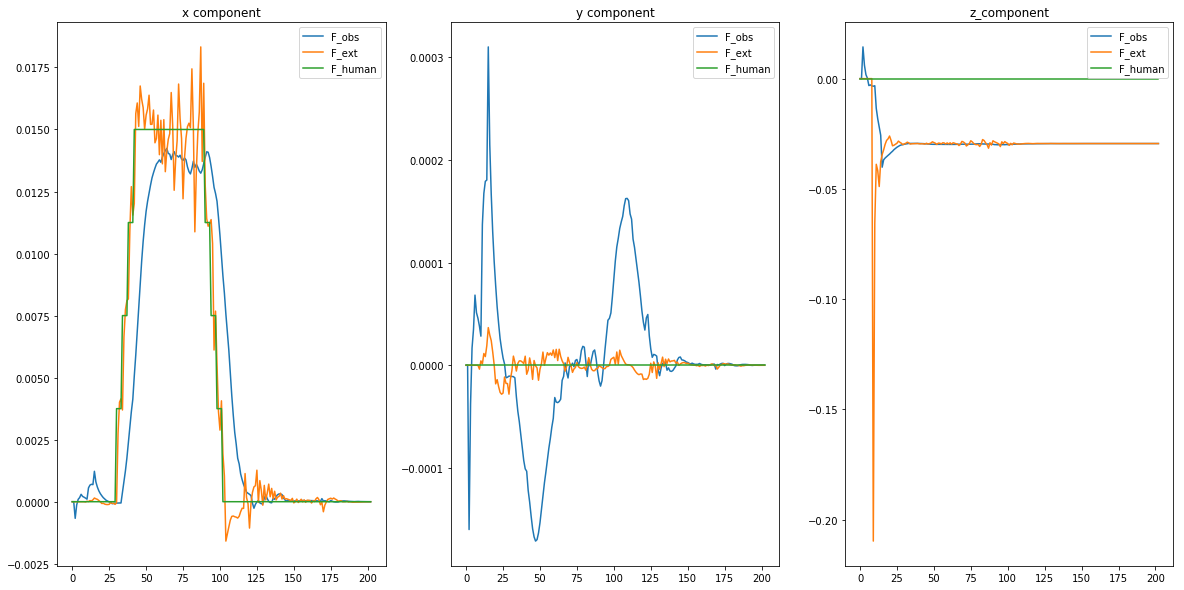

In [24]:
n1 = F_human.shape[0]
n2 = Fd_obs.shape[0]
k = int(n1/n2)
plot_vectors(Fd_obs, external_force, F_human, names=["F_obs", "F_ext", "F_human"])

In [25]:
data = np.load("one_drone_no_box_fd.npz")
Fd_obs = data["drone_1/Fd_obs"]
F_human = data["drone_1/F_human"]
for k in data.keys(): print(k)

drone_1/velocity
drone_1/Fd_obs
rosout
drone_1/control
rosout_agg
god/time
drone_1/position
drone_1/waypoint
drone_1/F_human


In [26]:
n1 = F_human.shape[0]
n2 = Fd_obs.shape[0]
k = int(n1/n2)
plot_vectors(Fd_obs, F_human[::k,:], names=["F_obs", "F_human"])

ValueError: slice step cannot be zero

In [27]:
data = np.load("one_drone_box_no_fd.npz")
Fd_obs= data["drone_1/Fd_obs"]
external_force = data["drone_1/external_force"]
for k in data.keys(): print(k)

drone_1/velocity
drone_1/external_force
drone_1/Fd_obs
box/position
box/F_human
rosout
drone_1/control
rosout_agg
god/time
drone_1/position
drone_1/waypoint


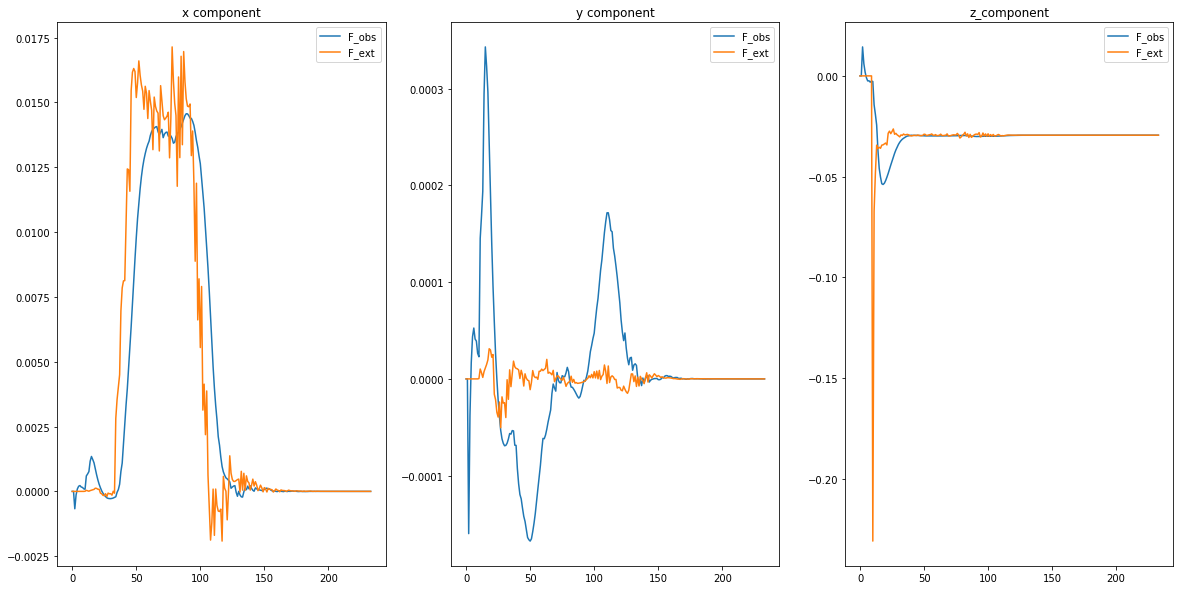

In [28]:
plot_vectors(Fd_obs, external_force, names=["F_obs", "F_ext"])

In [82]:
F_human.shape[0]

209924

In [83]:
Fd_obs.shape[0]

1078

0